# (Bike Sharing Analysis with Ford GoBike Data- March 2020 version)
## by (Adel Abu Hashim)
> may 2020

## Intro

> The project is about bicycle-sharing systems; many people particulary in Euorpe can't live without this amazing idean besides it is so good for investors.
Using Bikes reduces pollution due to minimize using gas vicyles; so it is benificial for ordinary people(good for time and price), investors and also our environment.

## Preliminary Wrangling

> You will see analsyis due to last version of data second half of 2017

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# load in the dataset into a pandas dataframe, print statistics
ford = pd.read_csv('2017-fordgobike-tripdata.csv')

## ASSESSING DATA

In [3]:
# high-level overview of data shape and composition
print(ford.shape)
print(ford.dtypes)
print(ford.head(10))

(519700, 13)
duration_sec                 int64
start_time                  object
end_time                    object
start_station_id             int64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id               int64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
dtype: object
   duration_sec                start_time                  end_time  \
0         80110  2017-12-31 16:57:39.6540  2018-01-01 15:12:50.2450   
1         78800  2017-12-31 15:56:34.8420  2018-01-01 13:49:55.6170   
2         45768  2017-12-31 22:45:48.4110  2018-01-01 11:28:36.8830   
3         62172  2017-12-31 17:31:10.6360  2018-01-01 10:47:23.5310   
4         43603  2017-12-31 14:23:14.0010  2018-01-01 02:29:57.5710   
5          9226  2017-12-31 22:51:00.9180  2018-01-01 01:24:47.1660   
6          4507  2017

In [4]:
# descriptive statistics for numeric variables
print(ford.describe())

        duration_sec  start_station_id  start_station_latitude  \
count  519700.000000     519700.000000           519700.000000   
mean     1099.009521         95.034245               37.771653   
std      3444.146451         86.083078                0.086305   
min        61.000000          3.000000               37.317298   
25%       382.000000         24.000000               37.773492   
50%       596.000000         67.000000               37.783521   
75%       938.000000        139.000000               37.795392   
max     86369.000000        340.000000               37.880222   

       start_station_longitude  end_station_id  end_station_latitude  \
count            519700.000000   519700.000000         519700.000000   
mean               -122.363927       92.184041             37.771844   
std                   0.105573       84.969491              0.086224   
min                -122.444293        3.000000             37.317298   
25%                -122.411726       23.00000

In [5]:
ford.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id',
       'user_type'],
      dtype='object')

### What is the structure of your dataset?

There are 519700 bike trip in the dataset with 13 features ('duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id',
       'user_type). Variables are different in types, but most data are numeric; floats.


### What is/are the main feature(s) of interest in your dataset?

I am most interested in figuring out when and where are most trips taken.

    Also, I am interested in what are the characteristics (user_type) of the riders and the duration of the trips in these time points and locations.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I think the features will help me are so obvious: start and endstation and time of trip an d user types.



## Doing some Data Cleaning 
- fix date format

In [6]:
ford_clean = ford

In [7]:
# Convert time variables from string to datetime
ford_clean['start_time'] = pd.to_datetime(ford_clean['start_time'])
ford_clean['end_time'] = pd.to_datetime(ford_clean['end_time'])
print(ford_clean['start_time'])
print(ford_clean['end_time'])

0        2017-12-31 16:57:39.654
1        2017-12-31 15:56:34.842
2        2017-12-31 22:45:48.411
3        2017-12-31 17:31:10.636
4        2017-12-31 14:23:14.001
                   ...          
519695   2017-06-28 10:00:54.528
519696   2017-06-28 09:56:39.631
519697   2017-06-28 09:47:36.347
519698   2017-06-28 09:47:41.664
519699   2017-06-28 09:49:46.377
Name: start_time, Length: 519700, dtype: datetime64[ns]
0        2018-01-01 15:12:50.245
1        2018-01-01 13:49:55.617
2        2018-01-01 11:28:36.883
3        2018-01-01 10:47:23.531
4        2018-01-01 02:29:57.571
                   ...          
519695   2017-06-28 10:08:10.438
519696   2017-06-28 10:03:51.090
519697   2017-06-28 09:54:41.187
519698   2017-06-28 09:53:47.715
519699   2017-06-28 09:52:55.338
Name: end_time, Length: 519700, dtype: datetime64[ns]


In [8]:
# extract month from dates
ford_clean['start_time_month']=ford_clean['start_time'].dt.month.astype(int)

In [9]:
ford_clean.tail()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,start_time_month
519695,435,2017-06-28 10:00:54.528,2017-06-28 10:08:10.438,81,Berry St at 4th St,37.775880,-122.393170,45,5th St at Howard St,37.781752,-122.405127,400,Subscriber,6
519696,431,2017-06-28 09:56:39.631,2017-06-28 10:03:51.090,66,3rd St at Townsend St,37.778742,-122.392741,321,5th at Folsom,37.780146,-122.403071,316,Subscriber,6
519697,424,2017-06-28 09:47:36.347,2017-06-28 09:54:41.187,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,48,2nd St at S Park St,37.782411,-122.392706,240,Subscriber,6
519698,366,2017-06-28 09:47:41.664,2017-06-28 09:53:47.715,58,Market St at 10th St,37.776619,-122.417385,59,S Van Ness Ave at Market St,37.774814,-122.418954,669,Subscriber,6
519699,188,2017-06-28 09:49:46.377,2017-06-28 09:52:55.338,25,Howard St at 2nd St,37.787522,-122.397405,48,2nd St at S Park St,37.782411,-122.392706,117,Subscriber,6


## Univariate Exploration

> In this section, I'll start by looking at user types.

### Which user type uses bikes most? 

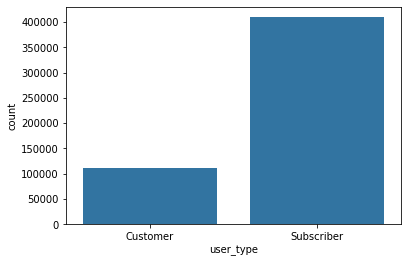

In [10]:
base_color = sb.color_palette()[0]
sb.countplot(data = ford, x = 'user_type', color = base_color)

**We could see that subscribers use bikes more than customers** this may due to cupons or other services provided for subscribers!

### Which bike rented the most? 

Text(0.5, 0, 'bike_id')

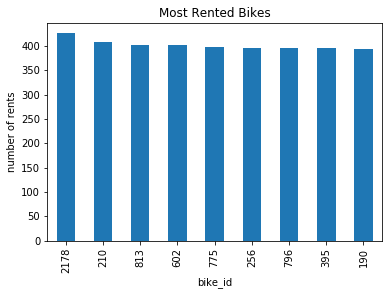

In [11]:
#get bikes' ids for most rented bikes
ford['bike_id'].value_counts()[1:10].plot(kind='bar')
plt.title('Most Rented Bikes')
plt.ylabel ('number of rents')
plt.xlabel ('bike_id')

##### Are bikes with those ids are from specific type, form specific factory!

## In which month bikes rented more?

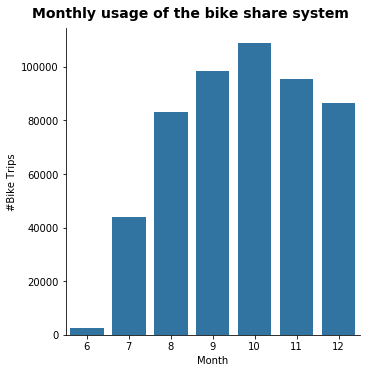

In [12]:
# monthly usege of the bike sharing system
plot = sb.catplot(data=ford_clean, x='start_time_month', kind='count', color = base_color)
plot.set_axis_labels("Month", "#Bike Trips")
plot.fig.suptitle('Monthly usage of the bike share system', y=1.03, fontsize=14, fontweight='semibold');

## Average time of trip?

Text(0.5, 0, 'Duration (min)')

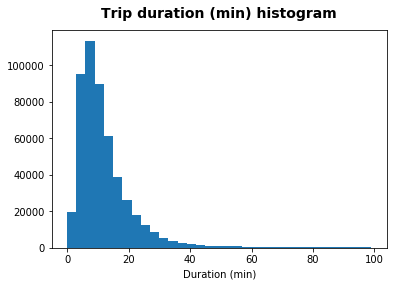

In [13]:
ford_clean['duration_min'] = ford_clean['duration_sec'] / 60
plt.hist(data = ford_clean, x = 'duration_min', bins = np.arange(0, 100,3))
plt.title("Trip duration (min) histogram", y=1.03, fontsize=14, fontweight='semibold')
plt.xlabel('Duration (min)')



Looking at the histogram, we can see that trip durations on average about 10 mins. 
So we can deduce that people go only to near places and prefer another mean of transport to go for places which take more than 30 minute on averag, also it is rare to take a bike for places which take less than 5 minutes.

    


### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> user types as expected; found that subscribers use the serviice more than customers and this was and expection as subscribers have copuns and sales. 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The Monthly usage of the bike share system, people in june and july use the service less than winter months which is strange as in winter it is hard to use bike due to raining and snow. 

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

##  Does month impact the trip duration?

In [14]:
ford_clean['start_time_month'].value_counts()

10    108937
9      98558
11     95612
12     86539
8      83292
7      44073
6       2689
Name: start_time_month, dtype: int64

Text(0, 0.5, 'Trip Duration in Minutes')

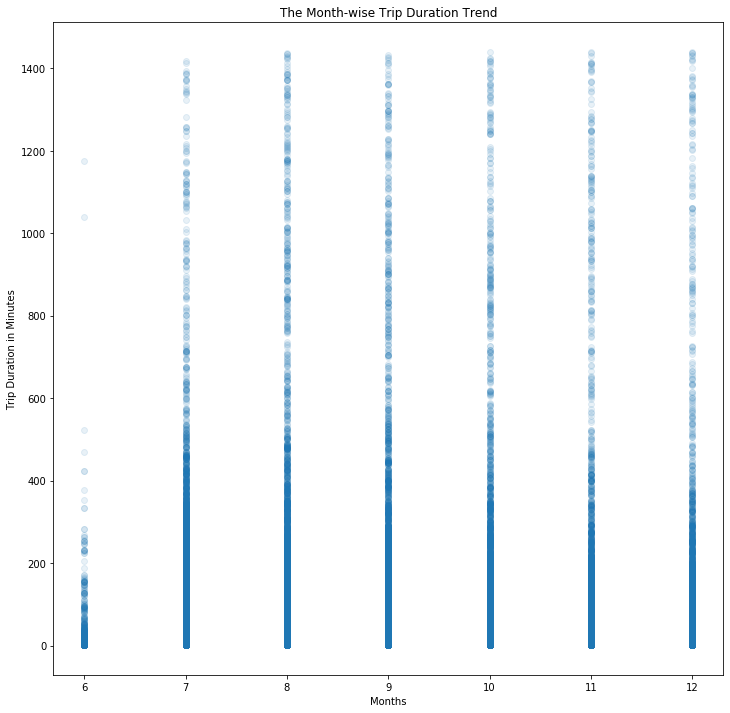

In [15]:
plt.figure(figsize = [12,12])
plt.scatter(data = ford_clean , x = 'start_time_month' , y = 'duration_min' , alpha = 0.1 )
plt.title('The Month-wise Trip Duration Trend')
plt.xlabel('Months')
plt.ylabel('Trip Duration in Minutes')

##### We can deduce that hotter months are less to use service

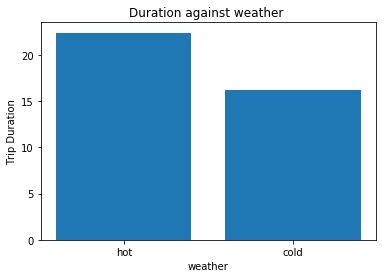

In [16]:
# We categorize our months for two categories; hot and cold
hot = ford_clean.query('start_time_month in ["6" , "7" , "8"]' ).duration_min.mean ()
cold = ford_clean.query('start_time_month in ["10" , "11" , "12"] ').duration_min.mean()

plt.bar(['hot','cold'],[hot , cold] )
plt.title('Duration against weather ')
plt.xlabel('weather')
plt.ylabel('Trip Duration');


### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

>      As per our expectations, we can verify that months has longest durations, but in cold months we found that trip duration was low on average 15 not like hot months which in agverage more than 20; it was about near 10 mintues difference! 

    Thus, we may conclude that the weather does affect the trip duration. Also, unlike cities like Boston,We can deduce that difference not great large as many american cities have cold in months we set to be hot! 


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> yes, weather affects the duration of trip!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

In [19]:
ford_clean.start_time_month.dtype

dtype('int32')

In [20]:
ford_clean.duration_min.dtype

dtype('float64')

In [23]:
ford_clean['duration_min'] = ford_clean['duration_min'].astype(int)
ford_clean.duration_min.dtype

dtype('int32')

In [28]:
ford_clean.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'start_time_month', 'duration_min'],
      dtype='object')

In [38]:
correlation = pd.DataFrame(ford_clean, columns = ['duration_sec',  'start_time_month', 'start_station_latitude', 'end_station_longitude'])

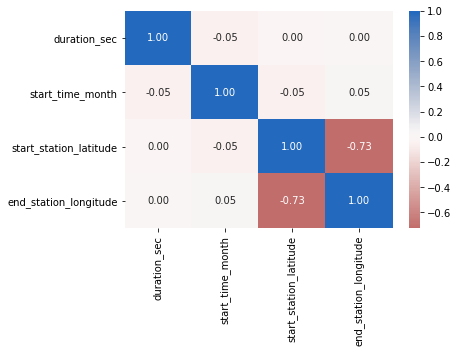

In [39]:
sb.heatmap(correlation.corr(), annot = True, fmt = '.2f', cmap = 'vlag_r', center = 0)

## What is the effect of user typr on trip duaration ?

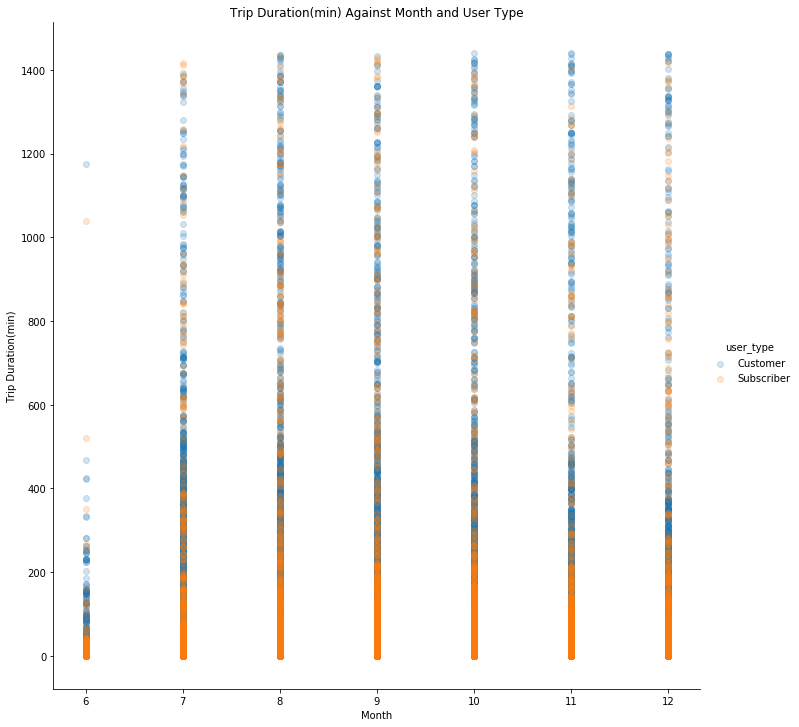

In [50]:
import seaborn as sb
import matplotlib.pyplot as plt

g = sb.FacetGrid(data = ford_clean, hue = 'user_type', height = 10)
g.map(plt.scatter, 'start_time_month','duration_min', alpha = 0.2)
g.add_legend()
plt.title('Trip Duration(min) Against Month and User Type')
plt.xlabel('Month')
plt.ylabel('Trip Duration(min)');



C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


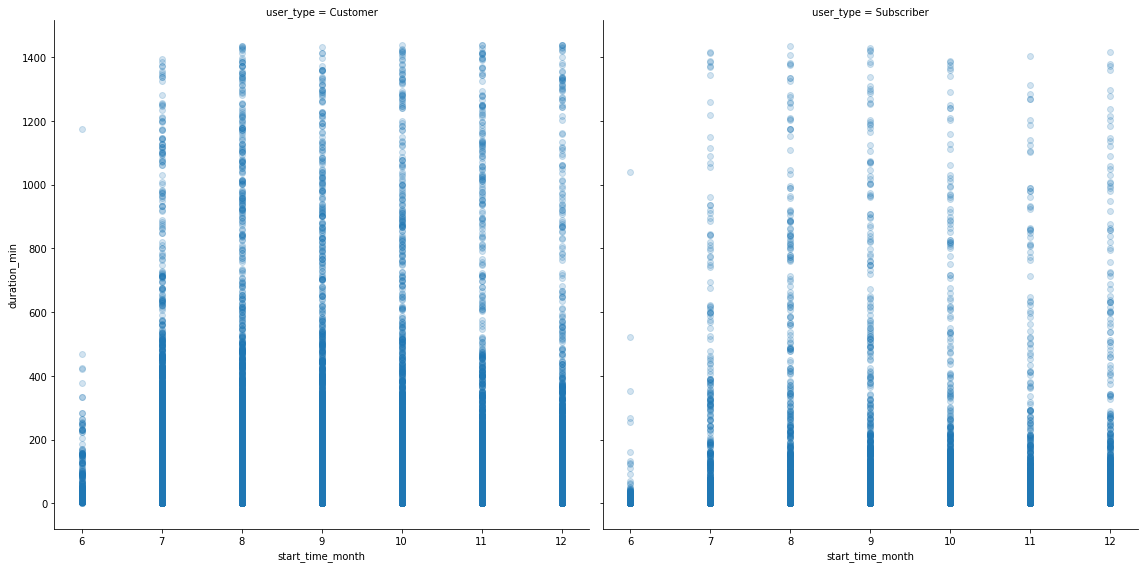

In [51]:
m = sb.FacetGrid(data =  ford_clean, col = 'user_type', size = 8, col_wrap = 2)
m.map(sb.regplot, 'start_time_month', 'duration_min', y_jitter = 0.04, fit_reg = False,scatter_kws = {'alpha' : 1/5});

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> good correlation between end and start stations, trips are near mostly!

### Were there any interesting or surprising interactions between features?

> although subscribers are more than customers, custoers mad longer trips!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!